# Hello world for machine learning with iris dataset 

In [0]:
#importing various library for making machine learning model
import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [0]:
#load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-lenth','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url,names = names)

##Summarize The Dataset

In [3]:
#DIMENSION OF DATASET


#shape
print('Shape of dataset: ' + str(dataset.shape))

Shape of dataset: (150, 5)


In [4]:
#PEEK AT THE DATA

#head
print(dataset.head(20))

    sepal-lenth  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
10          5.4          3.7           1.5          0.2  Iris-setosa
11          4.8          3.4           1.6          0.2  Iris-setosa
12          4.8          3.0           1.4          0.1  Iris-setosa
13          4.3          3.0      

In [5]:
#STATISTICAL SUMMARY
  
#descriptions

print(dataset.describe())

       sepal-lenth  sepal-width  petal-length  petal-width
count   150.000000   150.000000    150.000000   150.000000
mean      5.843333     3.054000      3.758667     1.198667
std       0.828066     0.433594      1.764420     0.763161
min       4.300000     2.000000      1.000000     0.100000
25%       5.100000     2.800000      1.600000     0.300000
50%       5.800000     3.000000      4.350000     1.300000
75%       6.400000     3.300000      5.100000     1.800000
max       7.900000     4.400000      6.900000     2.500000


In [6]:
#CLASS DISTRIBUTION
  
print(dataset.groupby('class').size()) #we can seet that each class has the same number of instances

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Data visualization

sepal-lenth        AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

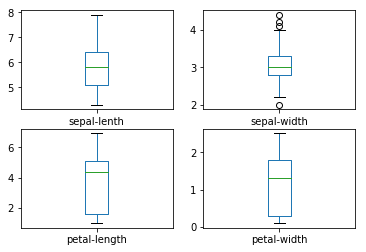

In [7]:
#UNIAVRIATE PLOTS

#box and whisker plots

dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)

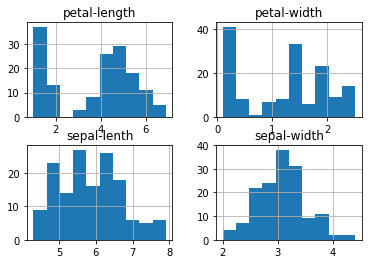

In [8]:
#histograms
dataset.hist()
plt.show()

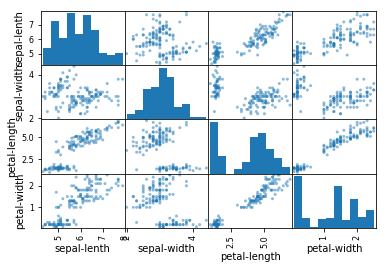

In [9]:
#scatter plot matrix
scatter_matrix(dataset)
plt.show()

## Evaluate Some Algorithms

In [0]:
#CREATE A VALIDATION DATASET

#Split-out validation dataset

array = dataset.values
X = array[:,0:4]
Y = array[:,4]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size = validation_size, random_state = seed)

In [11]:
#spot check Algorithms
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))


#evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits = 10,shuffle=False, random_state = None)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = None)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)
